# Make an interactive graph for SPM

In [11]:
# Import data
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import h5py
from tqdm import *
from scipy.optimize import minimize

%matplotlib inline
# f = h5py.File("SPM_data_1c_2c.hdf5", "r")
f = h5py.File("data/SPM_data_10k_const_Upp.hdf5", "r")
# f = h5py.File("data/SPM_data_2c_1c_halfc.hdf5","r")
X_train = f['X_train']
# Y_train = f['Y_train']
Y_train = f['Y_train'][:,21:35]
X_test = f['X_test']
Y_test = f['Y_test'][:,21:35]

print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
print Y_train[1]
f.close()

(7500, 1000) (7500L, 14L) (2500, 1000) (2500L, 14L)
[  922.84002686  2902.5           15.52900028    14.15600014   114.69000244
   150.38999939   253.63000488   165.28999329   211.08000183    10.02999973
     9.97340012    10.06400013    42.09500122    41.17599869]


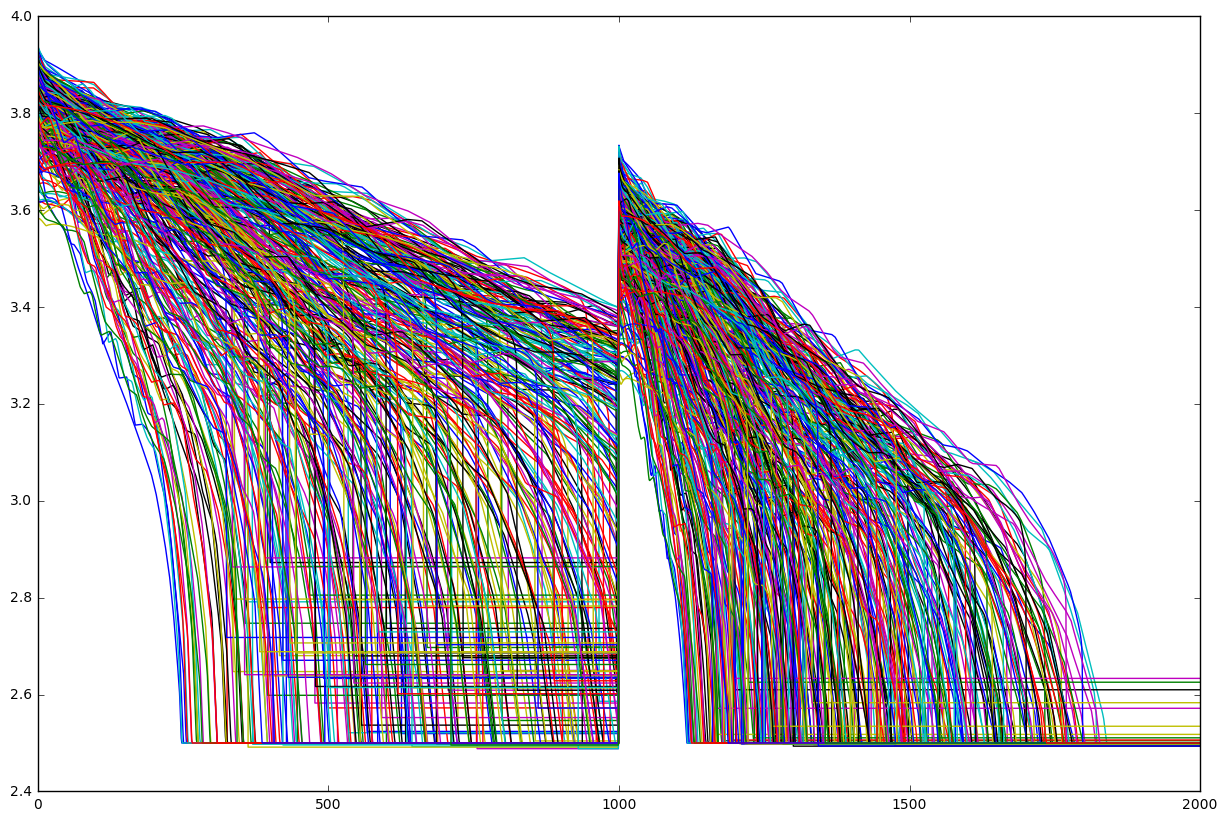

In [5]:
#plot data
y_1=[]
plt.figure(figsize=(15,10))
# for i in range(1000):
#     y_1.append(i)
y_1 = range(X_train.shape[1])
for i in range(X_train.shape[0]/20):
    try:
        plt.plot(y_1,X_train[i])
#         print Y_train[i]
    except:
        pass
#     plt.plot(y_1,X_train_noise[i][153:204])
plt.xlim()
plt.show()

In [6]:
# Train forwards ML algorithms
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR

import time
#Extra Random Forest
print("extra trees")
start_time = time.time()
etr1 = ExtraTreesRegressor(n_estimators=30, n_jobs=-1,max_depth=20)
etr1.fit(Y_train,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', etr1.score(Y_test,X_test), 'Train:', etr1.score(Y_train,X_train))
start_time = time.time()

#Decision tree
import time
print("decision tree")
start_time = time.time()
dt = DecisionTreeRegressor()
dt.fit(Y_train,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', dt.score(Y_test,X_test), 'Train:', dt.score(Y_train,X_train))
start_time = time.time()

extra trees


KeyboardInterrupt: 

In [7]:
# print etr1.predict([[4.32800007, 4.13380003, 4.08430004, 4.04290009, 4.01310015
# , 3.97790003, 3.92140007, 3.8736999,  3.82150006, 3.76830006
# , 3.72860003, 3.6796999,  3.6408, 3.59629989, 3.55139995
# , 3.51859999, 3.45289993, 3.36980009, 3.25609994, 3.06159997
# , 2.62039995,   542.44000244,  1631.69995117, 7.50379992, 7.6013999
# ,20.,71.875,309.05999756,   334.22000122,   209.21000671
# , 9.96249962, 9.96249962, 9.96249962,42.3409996, 41.10499954]])

In [8]:
#Train a Reverse Model
# print X_test
# print Y_test
print("extra trees")
start_time = time.time()
etr2 = ExtraTreesRegressor(n_estimators=100, n_jobs=-1,max_depth=21)
etr2.fit(X_train,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', etr2.score(X_test,Y_test), 'Train:', etr2.score(X_train,Y_train))

#Decision tree
import time
print("decision tree")
start_time = time.time()
lin3 = DecisionTreeRegressor()
lin3.fit(X_train,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('Test:', lin3.score(X_test,Y_test), 'Train:', lin3.score(X_train,Y_train))

extra trees
--- 211.707000017 seconds ---
('Test:', 0.044977608693096756, 'Train:', 0.96038331381427322)
decision tree
--- 32.1710000038 seconds ---
('Test:', -0.72884048870010909, 'Train:', 1.0)


In [9]:
#import target curve:
target = np.genfromtxt('targets/target1.csv', delimiter=',')
target_2c = np.genfromtxt('targets/target_2c_real.csv', delimiter=',')
targettime = np.linspace(0,3513,num=1000)
# targetdata = np.interp(targettime,target[:,0], target[:,1])
targetdata = np.concatenate((np.interp(targettime,target[:,0], target[:,1]),np.interp(targettime,target_2c[:,0], target_2c[:,1])),axis=0)
print targetdata.shape

(2000L,)


In [10]:
# Make a good guess for the match:
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
st=time.time()
# Akready Trained: etr1 (forwards Random Forest), dt (Forwards Decision Tree), etr2 (Reverse Random Forest)
# Plug target data into reverse model
targetpred = etr2.predict(targetdata.reshape(1,-1))
# Use those values as starting point for DT optimization
# def fitness2(individual1):
#     rms=sqrt(mean_squared_error(dt.predict(np.asarray(individual1).reshape(1,-1))[0], targetdata))
#     return rms
# x0 = targetpred
# res1 = minimize(fitness2, x0, method='nelder-mead',
#                 options={'xtol': 1e-8, 'disp': True})
# # Plug output of the optimized DT into the reverse model:
# targetpred2 = etr2.predict(dt.predict(res1.x.reshape(1,-1)).reshape(1,-1))
# print time.time()-st
# print targetpred2

In [10]:
# Create the interactive graphs
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.charts import color
output_notebook()
targetpred2 = targetpred
# print targetdata.shape
x = np.linspace(0, 3500, 1000)
y = targetdata
y2 = dt.predict(targetpred2)[0,:]
# y3 = linspace(0,)
# y2 = dt.predict(targetpred2)[0,:]
# print targetpred[0][0:21]
# print targetpred[0][22:35]
names_list = ['Dsp', 'Dsn', 'kp', 'kn', 'Rpp', 'Rpn', 'lp', 'ln', 'rhosei', 'iosei', 'rsei', 'kappasei', 'ep', 'en']
lower_bound = []
upper_bound = []
for i in range(14):
#     print min(Y_train[:,i])
    lower_bound.append(min(Y_train[:,i]))
    upper_bound.append(max(Y_train[:,i]))
print names_list
print lower_bound
print upper_bound
# targetpred2=[targetpred3]
p = figure(title="Discharge Curve", plot_height=300, plot_width=600, y_range=(2,5))
pp = figure(title="Resultant i", plot_height=300, plot_width=600, x_range = p.x_range, y_range=p.y_range)
r = p.line(x, y, color="#2222aa", line_width=3)
rr = p.line(x, y2, color="red", line_width=3)
# rrr = pp.line(x, y3, color="red", line_width=3)


def update(Dsp=targetpred2[0][0], Dsn=targetpred2[0][1], kp=targetpred2[0][2], kn=targetpred2[0][3],
          Rpp=targetpred2[0][4], Rpn=targetpred2[0][5], lp=targetpred2[0][6], ln=targetpred2[0][7],
          rhosei=targetpred2[0][8], iosei=targetpred2[0][9], rsei=targetpred2[0][10], kappasei=targetpred2[0][11], 
          ep=targetpred2[0][12], en=targetpred2[0][13]):
    Upp=targetpred2[0][0:22].tolist()
    Upp=[]
    Upp.append(Dsp)
    Upp.append(Dsn)
    Upp.append(kp)
    Upp.append(kn)
    Upp.append(Rpp)
    Upp.append(Rpn)
    Upp.append(lp)
    Upp.append(ln)
    Upp.append(rhosei)
    Upp.append(iosei)
    Upp.append(rsei)
    Upp.append(kappasei)
    Upp.append(ep)
    Upp.append(en)
    
    Upp=np.array(Upp)
    r.data_source.data['y'] = targetdata
    rr.data_source.data['y'] = etr1.predict([Upp])[0,:]
    push_notebook()

    
s = gridplot([[p]], toolbar_location=None)
show(s, notebook_handle=True)

Loading BokehJS ...

['Dsp', 'Dsn', 'kp', 'kn', 'Rpp', 'Rpn', 'lp', 'ln', 'rhosei', 'iosei', 'rsei', 'kappasei', 'ep', 'en']
[334.16, 1004.3, 3.3366001, 0.51811999, 20.014999, 25.009001, 107.66, 116.29, 207.89999, 9.8999996, 9.8999996, 9.8999996, 42.075001, 40.847]
[1000.9, 3012.1001, 16.673, 23.188, 139.99001, 174.98, 752.34003, 813.65997, 212.10001, 10.1, 10.1, 10.1, 42.924999, 41.672001]


In [11]:
# Create the sliders for the graphs
from ipywidgets import interact, interactive, fixed, interact_manual
# interact(update, Dsp=(int(lower_bound[0]),int(upper_bound[0]),0.01), 
#          Dsn=(int(lower_bound[1]),int(upper_bound[1]),0.01),  
#          kp=(int(lower_bound[2]),int(upper_bound[2]),0.01),  
#          kn=(int(lower_bound[3]),int(upper_bound[3]),0.01), 
#          Rpp=(int(lower_bound[4]),int(upper_bound[4]),0.01),  
#          Rpn=(int(lower_bound[5]),int(upper_bound[5]),0.01),  
#          lp=(int(lower_bound[6]),int(upper_bound[6]),0.01),  
#          ln=(int(lower_bound[7]),int(upper_bound[7]),0.01), 
#          rhosei=(int(lower_bound[8]),int(upper_bound[8]),0.01),  
#          iosei=(int(lower_bound[9]),int(upper_bound[9]),0.01),  
#          rsei=(int(lower_bound[10]),int(upper_bound[10]),0.01),  
#          kappasei=(int(lower_bound[11]),int(upper_bound[11]),0.01),  
#          ep=(int(lower_bound[12]),int(upper_bound[12]),0.01),  
#          en=(int(lower_bound[13]),int(upper_bound[13]),0.01))
interact(update,Dsp=(335.0,990.0,10.0),
        Dsn=(1010,3000,10),
        kp=(3.33,16.63,0.01),
        kn=(0.51,23.12,0.01),
        Rpp=(25.0,174.5,0.1), 
#         Rpp=fixed(20),
        Rpn=(25.0,174.5,0.1),
        lp=(107.5,750.6,0.1),
        ln=(116.2,811.7,0.1),
        rhosei=(207.9,212.1,0.1),
        iosei=(9.9,10.1,0.01),
        rsei=(9.9,10.1,0.01),
        kappasei=(9.9,10.1,0.01),
        ep=(42.075,42.923,0.001),
        en=(40.85,41.67,0.01))
# interact(update, ppp=(0.,1.,0.01))

In [ ]:
542.44000244,  1631.69995117, 7.50379992, 7.6013999
,20.,71.875,309.05999756,   334.22000122,   209.21000671
, 9.96249962, 9.96249962, 9.96249962,42.3409996, 41.10499954

(20171L, 2L) (59L, 2L)
(array([17765], dtype=int64),)
fit RMSE: 0.0389963250787


<function matplotlib.pyplot.show>

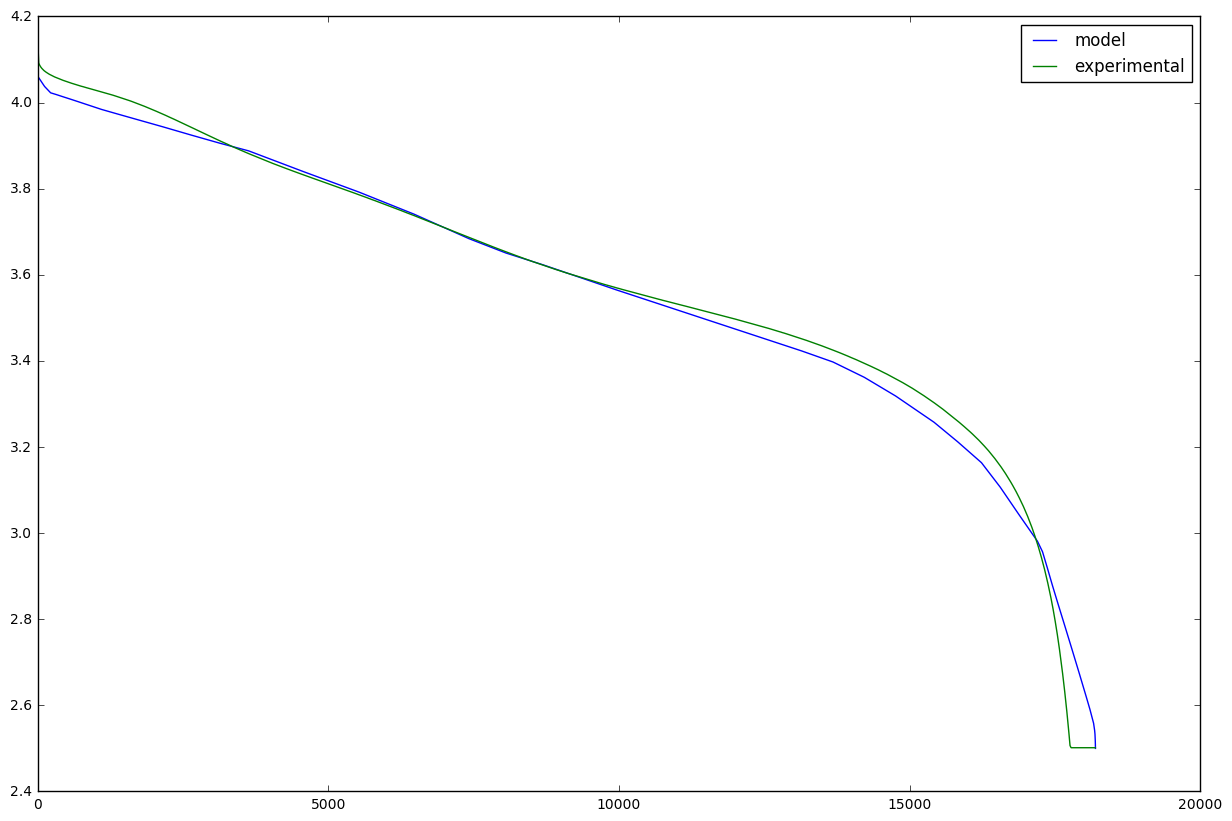

In [26]:
# Verify with 0.5C Data
from sklearn.metrics import mean_squared_error
from math import sqrt
target_2c = np.genfromtxt('targets/target_half_c_real.csv', delimiter=',')
model_2c = np.genfromtxt('targets/target_rev_halfc.csv', delimiter=',')
# print model_2c[:,0]
plt.figure(figsize=(15,10))
# plt.plot(target_2c[:,0], target_2c[:,1], label = 'experimental')
plt.plot(model_2c[:,0], model_2c[:,1], label = 'model')

print target_2c.shape, model_2c.shape
print np.where(target_2c[:,1]==min(target_2c[:,1]))
target_2c = target_2c[0:17765]
lin = np.linspace(0,max(model_2c[:,0]),1000)
target_error = np.interp(lin, target_2c[:,0],target_2c[:,1])
model_error = np.interp(lin, model_2c[:,0], model_2c[:,1])
rms=sqrt(mean_squared_error(model_error, target_error))
print 'fit RMSE:', rms
plt.plot(lin, target_error,label = 'experimental')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

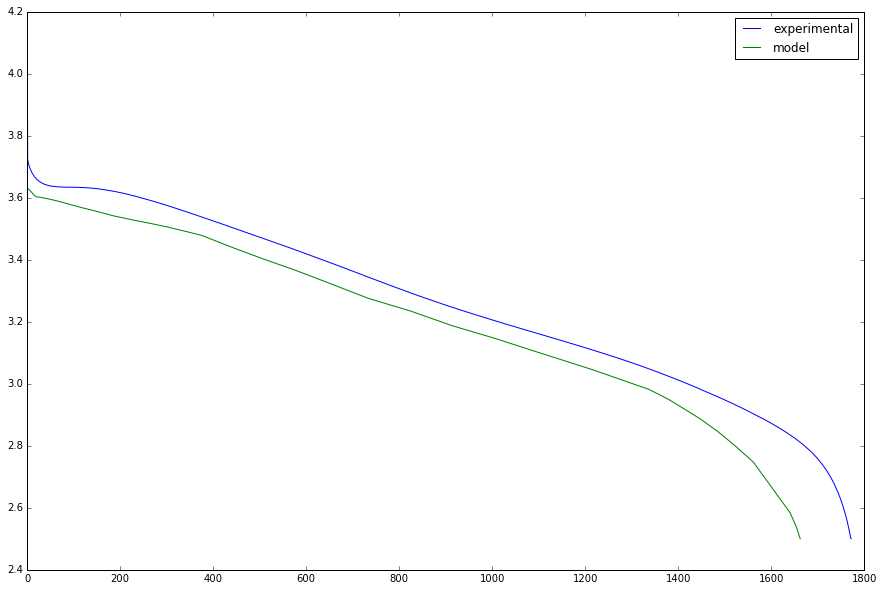

In [26]:
# Verify with 2C Data
target_2c = np.genfromtxt('target_2c_real.csv', delimiter=',')
model_2c = np.genfromtxt('target_2c_3.csv', delimiter=',')
# print model_2c[:,0]
plt.figure(figsize=(15,10))
plt.plot(target_2c[:,0], target_2c[:,1], label = 'experimental')
plt.plot(model_2c[:,0], model_2c[:,1], label = 'model')
plt.legend()
plt.show